In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('ts_human_activities.csv' )

In [26]:
df['date'] = pd.to_datetime(df['timestamp'], unit='ns')
df = df.sort_values(by="date")

In [27]:
df.set_index("date", inplace=True)

In [28]:
df

,user,activity,timestamp,x-axis,y-axis,z-axis
date,,,,,,
1970-01-01 00:01:13.452342,35,Standing,73452342000,2.03,9.47,2.91
1970-01-01 00:01:13.502330,35,Standing,73502330000,2.15,9.30,2.83
1970-01-01 00:01:13.552348,35,Standing,73552348000,2.22,9.38,2.83
1970-01-01 00:01:13.602336,35,Standing,73602336000,2.37,9.34,3.02
1970-01-01 00:01:13.652324,35,Standing,73652324000,2.30,9.28,2.83
...,...,...,...,...,...,...
1970-01-03 10:09:57.161469,7,Sitting,209397161469000,-6.74,-3.21,6.63
1970-01-03 10:09:57.201539,7,Sitting,209397201539000,-6.85,-3.26,6.63
1970-01-03 10:09:57.241517,7,Sitting,209397241517000,-6.85,-3.30,6.66


# Reduce frequency to seconds

In [29]:
df.shape

(1073623, 6)

In [30]:
dfd = df.resample('0.5S').first()
dfd.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
date,,,,,,
1970-01-01 00:01:13.000,35.0,Standing,7.345234e+10,2.03,9.47,2.91
1970-01-01 00:01:13.500,35.0,Standing,7.350233e+10,2.15,9.30,2.83
1970-01-01 00:01:14.000,35.0,Standing,7.400230e+10,2.26,9.43,2.79
1970-01-01 00:01:14.500,35.0,Standing,7.450236e+10,2.30,9.38,2.76
1970-01-01 00:01:15.000,35.0,Standing,7.510234e+10,2.34,9.38,2.83


In [31]:
dfd.isnull().sum()

user         354681
activity     354681
timestamp    354681
x-axis       354681
y-axis       354681
z-axis       354681
dtype: int64

In [32]:
dfd.dropna(inplace=True)

In [33]:
dfd.shape

(63968, 6)

<AxesSubplot: ylabel='activity'>

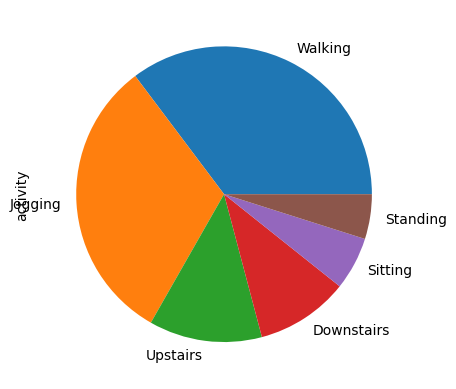

In [34]:
dfd.activity.value_counts().plot(kind = 'pie')

In [35]:
dfd.to_csv('ts_human_activities_with1sfreq.csv' ,index = True)

# Processing

In [36]:
import pandas as pd
from datetime import datetime
import plotly.express as px  # pip install plotly-express
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
d_parser = lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S')
df = pd.read_csv('ts_human_activities_with1sfreq.csv', parse_dates=['date'], date_parser=d_parser)
df['user'] = df['user'].astype('int')

In [38]:
df.head()

,date,user,activity,timestamp,x-axis,y-axis,z-axis
0,1970-01-01 00:01:13.000,35,Standing,7.345234e+10,2.03,9.47,2.91
1,1970-01-01 00:01:13.500,35,Standing,7.350233e+10,2.15,9.30,2.83
2,1970-01-01 00:01:14.000,35,Standing,7.400230e+10,2.26,9.43,2.79
3,1970-01-01 00:01:14.500,35,Standing,7.450236e+10,2.30,9.38,2.76
4,1970-01-01 00:01:15.000,35,Standing,7.510234e+10,2.34,9.38,2.83


In [39]:
list(df.activity.value_counts().index) ,list(df.activity.value_counts().values)

(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'],
 [22555, 20150, 7909, 6505, 3718, 3131])

# Sampling 

In [40]:
import pandas as pd
from tqdm import tqdm

df.shape

(63968, 7)

In [41]:
df.head()

,date,user,activity,timestamp,x-axis,y-axis,z-axis
0,1970-01-01 00:01:13.000,35,Standing,7.345234e+10,2.03,9.47,2.91
1,1970-01-01 00:01:13.500,35,Standing,7.350233e+10,2.15,9.30,2.83
2,1970-01-01 00:01:14.000,35,Standing,7.400230e+10,2.26,9.43,2.79
3,1970-01-01 00:01:14.500,35,Standing,7.450236e+10,2.30,9.38,2.76
4,1970-01-01 00:01:15.000,35,Standing,7.510234e+10,2.34,9.38,2.83


In [42]:
df.iloc[[0]]

,date,user,activity,timestamp,x-axis,y-axis,z-axis
0,1970-01-01 00:01:13,35,Standing,7.345234e+10,2.03,9.47,2.91


In [43]:
df.iloc[0,:]

date         1970-01-01 00:01:13
user                          35
activity                Standing
timestamp          73452342000.0
x-axis                      2.03
y-axis                      9.47
z-axis                      2.91
Name: 0, dtype: object

In [44]:
pbar = tqdm(desc= 'while loop', total =df.shape[0] - 1)
i = 0
count = 0
samples = 20
df_sampled = pd.DataFrame()
chunk = pd.DataFrame()
while i < (df.shape[0] - 1):
    # same activity and user check
    while (i < (df.shape[0] - 2)) & (count < samples) & (df.iloc[i ,2] == df.iloc[i+1 ,2]) & (df.iloc[i ,1] == df.iloc[i+1 ,1]):
            count+=1
            chunk = pd.concat([chunk , df.iloc[[i]]])
            i+=1
    i+=1
    pbar.update(count + 1)
    count = 0
    if chunk.shape[0] == samples :
        df_sampled = pd.concat([df_sampled , chunk])
    chunk = pd.DataFrame()
print(df_sampled.shape)


while loop: 100%|██████████| 63967/63967 [02:53<00:00, 368.00it/s] 


(40540, 7)


In [45]:
df_sampled.to_csv('train.csv')

In [46]:
df_sampled[::samples]

,date,user,activity,timestamp,x-axis,y-axis,z-axis
0,1970-01-01 00:01:13.000,35,Standing,7.345234e+10,2.03,9.47,2.91
21,1970-01-01 00:01:23.500,35,Standing,8.351231e+10,2.79,9.23,2.96
42,1970-01-01 00:01:34.000,35,Standing,9.401234e+10,2.64,9.28,3.15
63,1970-01-01 00:01:44.500,35,Standing,1.045123e+11,2.49,9.34,2.83
84,1970-01-01 00:01:55.000,35,Standing,1.150423e+11,2.45,9.43,2.87
...,...,...,...,...,...,...,...
63862,1970-01-03 10:09:04.500,7,Sitting,2.093445e+14,-6.59,-3.30,6.74
63883,1970-01-03 10:09:15.000,7,Sitting,2.093550e+14,-6.47,-3.36,6.89
63904,1970-01-03 10:09:25.500,7,Sitting,2.093655e+14,-6.70,-3.30,6.66
63925,1970-01-03 10:09:36.000,7,Sitting,2.093761e+14,-6.74,-3.15,6.70
